# Import dependencies and define colors

In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from MExit_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Specify_colors 
SMC4_color = '#4169E1' #'royalblue'
NCAPH_color = '#1E90FF' # 'dodgerblue'
NCAPH2_color = '#6495ED' # 'cornflowerblue'
CTCF_color = '#FF1493' #'deeppink'
RAD21_color = '#008000' # 'green'
STAG1_color = '#32CD32' # 'limegreen'
STAG2_color = '#228B22' # 'forestgreen'
grey_color = '#808080' # 'grey'

# Data Import
The Mitotic Exit Data was quality controlled and manually curated into separate text files for each POI. 

In [29]:
os.getcwd()
os.chdir("C:\\GIT\\MExit_Brunner_2024\\Data\\02_MExit_imaging\\01_Extracted_parameters_combined_by_POI")

RAD21 = pd.read_csv("Extracted_parameters_combined-RAD21.txt", sep = "\t")
STAG1 = pd.read_csv("Extracted_parameters_combined-STAG1.txt", sep = "\t")
STAG2 = pd.read_csv("Extracted_parameters_combined-STAG2.txt", sep = "\t")
CTCF = pd.read_csv("Extracted_parameters_combined-CTCF.txt", sep = "\t")
SMC4 = pd.read_csv("Extracted_parameters_combined-SMC4.txt", sep = "\t")
NCAPH = pd.read_csv("Extracted_parameters_combined-NCAPH.txt", sep = "\t")
NCAPH2 = pd.read_csv("Extracted_parameters_combined-NCAPH2.txt", sep = "\t")

RAD21.name ='All Cohesins (RAD21), n='  + str(number_of_time_series(RAD21))
STAG1.name ='Cohesin-STAG1, n='  + str(number_of_time_series(STAG1))
STAG2.name ='Cohesin-STAG2, n=' + str(number_of_time_series(STAG2))
CTCF.name ='CTCF, n=' + str(number_of_time_series(CTCF))
SMC4.name ='All Condensins (SMC4), n='  + str(number_of_time_series(SMC4))
NCAPH.name ='Condensin I (NCAPH), n=' + str(number_of_time_series(NCAPH))
NCAPH2.name ='Condensin II (NCAPH2), n=' + str(number_of_time_series(NCAPH2))

# STAG1

### QC, Check time-series data

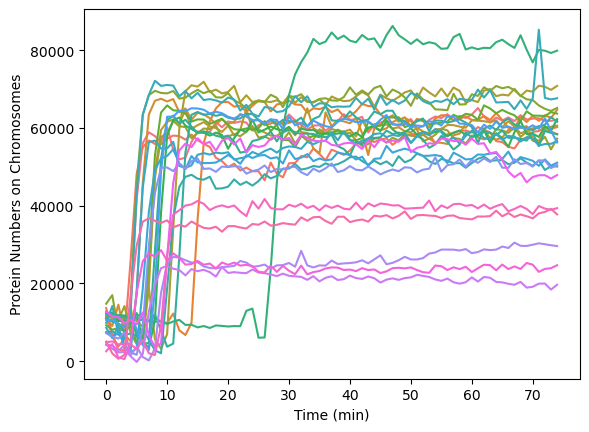

In [11]:
plot_time_series(STAG1, "N_nuc")


# Prepare data for plotting:

### Align data by Anaphase Onset (AO)

In [30]:
# align data by anaphase onset (AO)
RAD21_AO = align_time_series_AO(RAD21, "N_nuc")
STAG1_AO = align_time_series_AO(STAG1, "N_nuc")
STAG2_AO = align_time_series_AO(STAG2, "N_nuc")
CTCF_AO = align_time_series_AO(CTCF, "N_nuc")
SMC4_AO = align_time_series_AO(SMC4, "N_nuc")
NCAPH_AO = align_time_series_AO(NCAPH, "N_nuc")
NCAPH2_AO = align_time_series_AO(NCAPH2, "N_nuc")

### Normalize N_nuc to 2h after AO as 100%

In [31]:
SMC4_AO = relative_N_nuc(SMC4_AO)
NCAPH_AO = relative_N_nuc(NCAPH_AO)
NCAPH2_AO = relative_N_nuc(NCAPH2_AO)
CTCF_AO = relative_N_nuc(CTCF_AO)
RAD21_AO = relative_N_nuc(RAD21_AO)
STAG1_AO = relative_N_nuc(STAG1_AO)
STAG2_AO = relative_N_nuc(STAG2_AO)

### Calculate N per Mb

In [32]:
# assume that all POI is bound to chromatin and then calculate POI/Mb numbers
def POI_per_Mb(df):
    df["N_per_Mb"] = df["N_nuc"]/(2*7900) #7.900 Mb of genome x2 since we are looking at both daughter cells
    return df

POI_per_Mb(SMC4_AO)
POI_per_Mb(NCAPH_AO)
POI_per_Mb(NCAPH2_AO)
POI_per_Mb(RAD21_AO)
POI_per_Mb(STAG1_AO)
POI_per_Mb(STAG2_AO)
POI_per_Mb(CTCF_AO)
print()

### Calculate bound proteins based on spot-bleach experiment 

In [33]:
# Import bound fraction data

os.getcwd()
os.chdir(r"C:\GIT\MExit_Brunner_2024\Data\02_MExit_imaging\02_spot_bleach_summary")
SMC4_bound_fract = pd.read_csv("SMC4_averages.csv", sep = ",")
NCAPH_bound_fract = pd.read_csv("NCAPH_averages.csv", sep = ",")
NCAPH2_bound_fract = pd.read_csv("NCAPH2_averages.csv", sep = ",")
CTCF_bound_fract = pd.read_csv("CTCF_averages.csv", sep = ",")
RAD21_bound_fract = pd.read_csv("RAD21_averages.csv", sep = ",")
STAG1_bound_fract = pd.read_csv("STAG1_averages.csv", sep = ",")
STAG2_bound_fract = pd.read_csv("STAG2_averages.csv", sep = ",")


def calc_bound_N_nuc(df, df_bound_fract):
    name = df.name
    #calculate average bound fraction for all timepoints between -6 and +120 min:
    x = np.linspace(-6,120,64)
    y_f = interp1d(df_bound_fract["Cell cycle"], df_bound_fract["Avg_bound_fraction"], "linear", fill_value="extrapolate") #generate a function for every cell based on interpolation
    y = y_f(x) #calculate y for respective x value
    df_new = pd.DataFrame()
    df_new['time(min)'] = x.astype(int)
    df_new['avg_bound_fract'] = y*1/100
    #median bound fraction:
    z_f = interp1d(df_bound_fract["Cell cycle"], df_bound_fract["Median_bound_fraction"], "linear", fill_value="extrapolate") #generate a function for every cell based on interpolation
    z = z_f(x) #calculate y for respective x value
    df_new['median_bound_fract'] = z*1/100
    # print(df_new)

    df2 = pd.merge(df,
                  df_new,
                  left_on = 'time(min)',
                  right_on = 'time(min)',
                  how = 'left')
    # print(df2)
    df2['avg_bound_N_nuc'] = df2['N_nuc'] * (df2['avg_bound_fract'])
    df2["avg_bound_N_per_Mb"] = df2['avg_bound_N_nuc']/(2*7900) #7.900 Mb of genome x2 since I am looking at both daughter cells
    df2['median_bound_N_nuc'] = df2['N_nuc'] * (df2['median_bound_fract'])
    df2["median_bound_N_per_Mb"] = df2['median_bound_N_nuc']/(2*7900) #7.900 Mb of genome x2 since I am looking at both daughter cells
    df2.name = name
    return df2
    

# process all POI dataframes:
SMC4_AO = calc_bound_N_nuc(SMC4_AO, SMC4_bound_fract)
NCAPH_AO = calc_bound_N_nuc(NCAPH_AO, NCAPH_bound_fract)
NCAPH2_AO = calc_bound_N_nuc(NCAPH2_AO, NCAPH2_bound_fract)
RAD21_AO = calc_bound_N_nuc(RAD21_AO, RAD21_bound_fract)
STAG1_AO = calc_bound_N_nuc(STAG1_AO, STAG1_bound_fract)
STAG2_AO = calc_bound_N_nuc(STAG2_AO, STAG2_bound_fract)
CTCF_AO = calc_bound_N_nuc(CTCF_AO, CTCF_bound_fract)


# MAIN Figure Plots

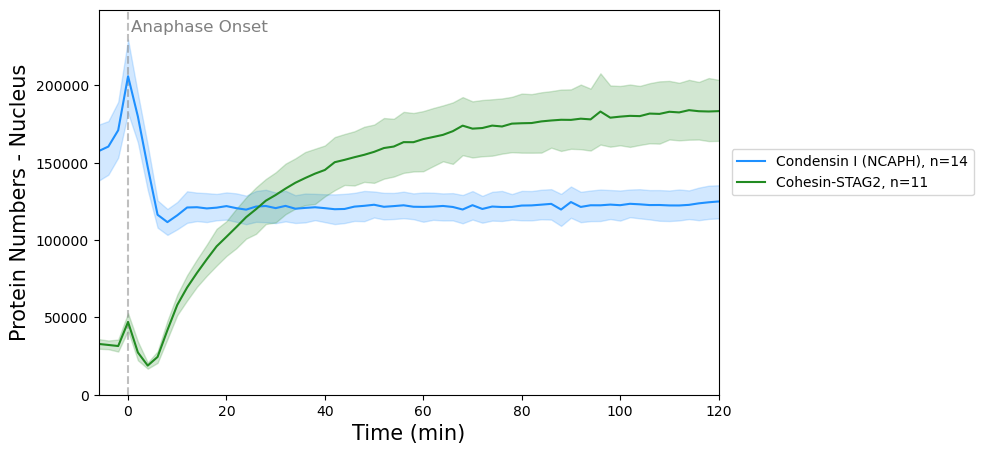

In [36]:
# plotting the overview mean time-series plot:

def plot_mean_all(df_SMC4, SMC4_color, df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_CTCF, CTCF_color, df_RAD21, RAD21_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(1,1, figsize = (8,5))
    plt.axvline(x = 0, color = 'grey', alpha =0.5, linestyle='--')
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_SMC4, ax=ax, label=str(df_SMC4.name), color = SMC4_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH, ax=ax, label=str(df_NCAPH.name), color = NCAPH_color)
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH2, ax=ax, label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = "dashed")
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_CTCF, ax=ax, label=str(df_CTCF.name), color = CTCF_color)
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_RAD21, ax=ax, label=str(df_RAD21.name), color = RAD21_color)
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG1, ax=ax, label=str(df_STAG1.name), color = STAG1_color, linestyle = "dashed")
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG2, ax=ax, label=str(df_STAG2.name), color = STAG2_color)
    ax.set_xlim(-6,120)
    ax.set_ylim(0,249000)
    plt.legend(bbox_to_anchor=(1.01, 0.5))
    plt.text(x= 0.5, y =235000.0, s= 'Anaphase Onset', color = 'grey', fontsize = 12)
    plt.xlabel("Time (min)", fontsize = 15)
    plt.ylabel("Protein Numbers - Nucleus", fontsize = 15)

plot_mean_all(SMC4_AO, SMC4_color, NCAPH_AO, NCAPH_color, NCAPH2_AO, NCAPH2_color, CTCF_AO, CTCF_color, RAD21_AO, RAD21_color, STAG1_AO, STAG1_color, STAG2_AO, STAG2_color,'N_nuc')

# MExit figure plots

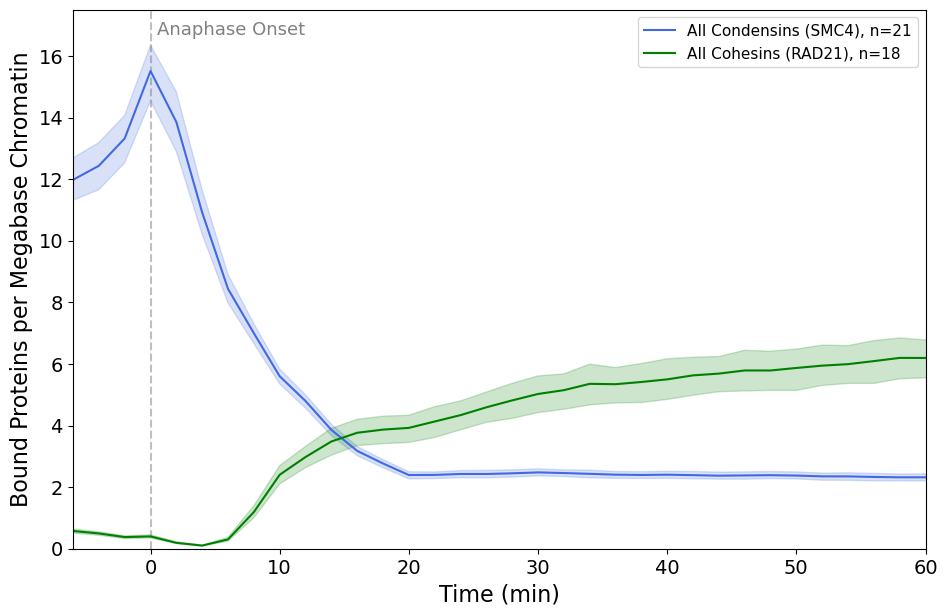

In [44]:
def plot_mean_all(df_SMC4, SMC4_color, df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_CTCF, CTCF_color, df_RAD21, RAD21_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(1,1, figsize = (11,7))
    plt.axvline(x = 0, color = 'grey', alpha =0.5, linestyle='--')
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_SMC4, ax=ax, label=str(df_SMC4.name), color = SMC4_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_RAD21, ax=ax, label=str(df_RAD21.name), color = RAD21_color)
    ax.set_xlim(-6,60)
    ax.set_ylim(0,17.5)
    ax.legend(loc=1, fontsize = 11)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.text(x= 0.5, y =16.7, s= 'Anaphase Onset', color = 'grey', fontsize = 13)
    plt.xlabel("Time (min)", fontsize = 16)
    plt.ylabel("Bound Proteins per Megabase Chromatin", fontsize = 16)

plot_mean_all(SMC4_AO, SMC4_color, NCAPH_AO, NCAPH_color, NCAPH2_AO, NCAPH2_color, CTCF_AO, CTCF_color, RAD21_AO, RAD21_color, STAG1_AO, STAG1_color, STAG2_AO, STAG2_color,'avg_bound_N_per_Mb')

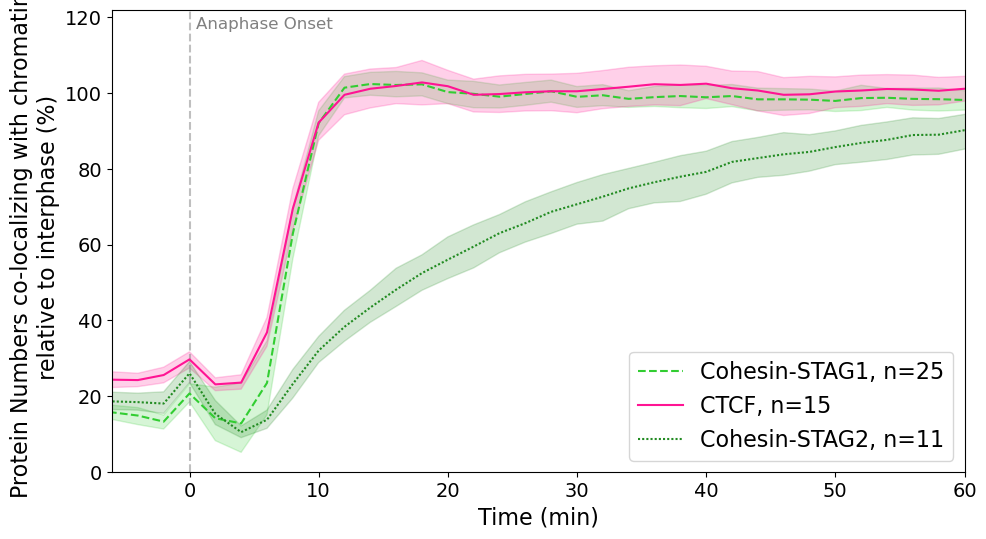

In [43]:
def plot_mean_all(df_SMC4, SMC4_color, df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_CTCF, CTCF_color, df_RAD21, RAD21_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(1,1, figsize = (11,6))
    plt.axvline(x = 0, color = 'grey', alpha =0.5, linestyle='--')
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_SMC4, ax=ax, label=str(df_SMC4.name), color = SMC4_color)
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH, ax=ax, label=str(df_NCAPH.name), color = NCAPH_color, linestyle = "dashed")
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH2, ax=ax, label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = (0, (1,1)))
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_RAD21, ax=ax, label=str(df_RAD21.name), color = RAD21_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG1, ax=ax, label=str(df_STAG1.name), color = STAG1_color, linestyle = "dashed")
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_CTCF, ax=ax, label=str(df_CTCF.name), color = CTCF_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG2, ax=ax, label=str(df_STAG2.name), color = STAG2_color, linestyle = (0, (1,1)))
    ax.set_xlim(-6,60)
    ax.set_ylim(0,122)
    ax.legend(loc=1, fontsize = 11)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.text(x= 0.5, y =117, s= 'Anaphase Onset', color = 'grey', fontsize = 12)
    plt.xlabel("Time (min)", fontsize = 16)
    plt.ylabel("Protein Numbers co-localizing with chromatin \n relative to interphase (%)", fontsize = 16)
    plt.legend(fontsize =16)

plot_mean_all(SMC4_AO, SMC4_color, NCAPH_AO, NCAPH_color, NCAPH2_AO, NCAPH2_color, CTCF_AO, CTCF_color, RAD21_AO, RAD21_color, STAG1_AO, STAG1_color, STAG2_AO, STAG2_color,'N_nuc_relative') #avg_bound_N_per_Mb

# Supplementary Figure Plots

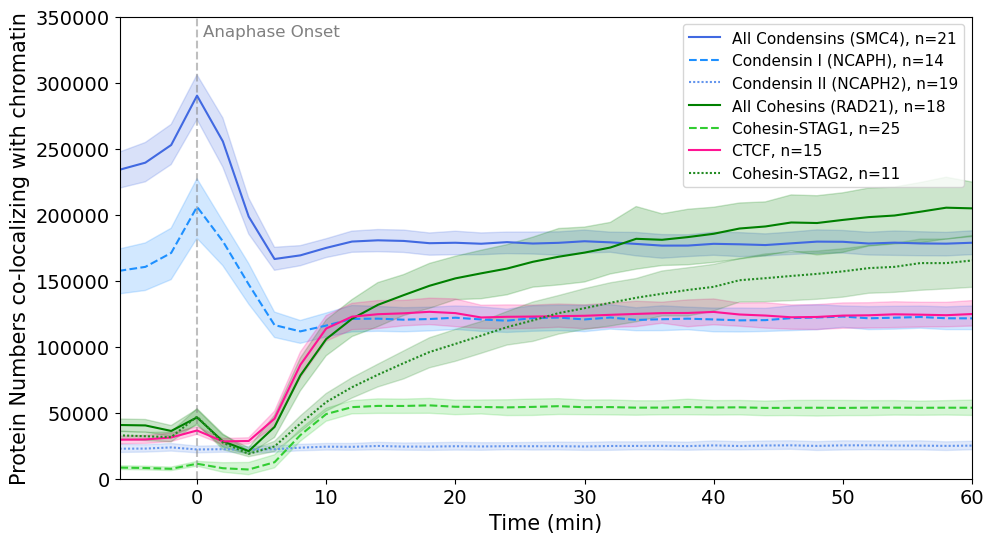

In [56]:
def plot_mean_all(df_SMC4, SMC4_color, df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_CTCF, CTCF_color, df_RAD21, RAD21_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(1,1, figsize = (11,6))
    plt.axvline(x = 0, color = 'grey', alpha =0.5, linestyle='--')
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_SMC4, ax=ax, label=str(df_SMC4.name), color = SMC4_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH, ax=ax, label=str(df_NCAPH.name), color = NCAPH_color, linestyle = "dashed")
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH2, ax=ax, label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = (0, (1,1)))
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_RAD21, ax=ax, label=str(df_RAD21.name), color = RAD21_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG1, ax=ax, label=str(df_STAG1.name), color = STAG1_color, linestyle = "dashed")
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_CTCF, ax=ax, label=str(df_CTCF.name), color = CTCF_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG2, ax=ax, label=str(df_STAG2.name), color = STAG2_color, linestyle = (0, (1,1)))
    ax.set_xlim(-6,60)
    ax.set_ylim(0,350000)
    ax.legend(loc=1, fontsize = 11)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.text(x= 0.5, y =335000, s= 'Anaphase Onset', color = 'grey', fontsize = 12)
    plt.xlabel("Time (min)", fontsize = 15)
    plt.ylabel("Protein Numbers co-localizing with chromatin", fontsize = 15)

plot_mean_all(SMC4_AO, SMC4_color, NCAPH_AO, NCAPH_color, NCAPH2_AO, NCAPH2_color, CTCF_AO, CTCF_color, RAD21_AO, RAD21_color, STAG1_AO, STAG1_color, STAG2_AO, STAG2_color,'N_nuc')

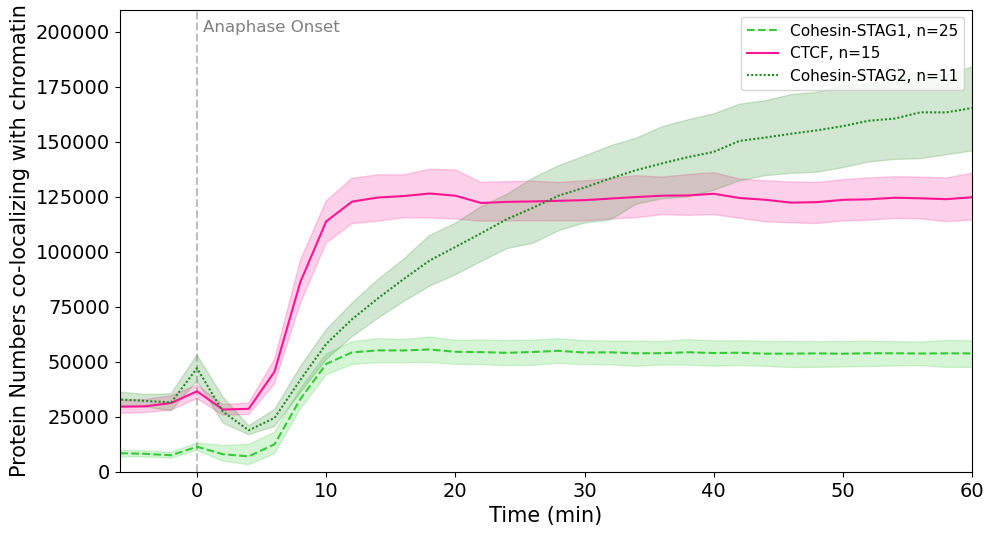

In [55]:
def plot_mean_all(df_SMC4, SMC4_color, df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_CTCF, CTCF_color, df_RAD21, RAD21_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(1,1, figsize = (11,6))
    plt.axvline(x = 0, color = 'grey', alpha =0.5, linestyle='--')
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_SMC4, ax=ax, label=str(df_SMC4.name), color = SMC4_color)
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH, ax=ax, label=str(df_NCAPH.name), color = NCAPH_color, linestyle = "dashed")
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH2, ax=ax, label=str(df_NCAPH2.name), color = NCAPH2_color, linestyle = (0, (1,1)))
    # sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_RAD21, ax=ax, label=str(df_RAD21.name), color = RAD21_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG1, ax=ax, label=str(df_STAG1.name), color = STAG1_color, linestyle = "dashed")
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_CTCF, ax=ax, label=str(df_CTCF.name), color = CTCF_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG2, ax=ax, label=str(df_STAG2.name), color = STAG2_color, linestyle = (0, (1,1)))
    ax.set_xlim(-6,60)
    ax.set_ylim(0,210000)
    ax.legend(loc=1, fontsize = 11)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.text(x= 0.5, y =200000, s= 'Anaphase Onset', color = 'grey', fontsize = 12)
    plt.xlabel("Time (min)", fontsize = 15)
    plt.ylabel("Protein Numbers co-localizing with chromatin", fontsize = 15)

plot_mean_all(SMC4_AO, SMC4_color, NCAPH_AO, NCAPH_color, NCAPH2_AO, NCAPH2_color, CTCF_AO, CTCF_color, RAD21_AO, RAD21_color, STAG1_AO, STAG1_color, STAG2_AO, STAG2_color,'N_nuc')

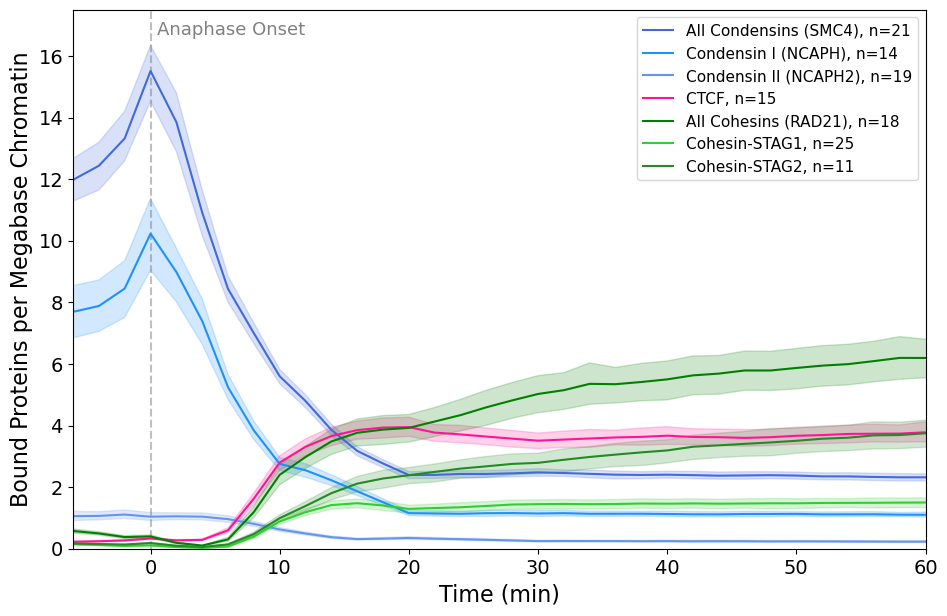

In [57]:
def plot_mean_all(df_SMC4, SMC4_color, df_NCAPH, NCAPH_color, df_NCAPH2, NCAPH2_color, df_CTCF, CTCF_color, df_RAD21, RAD21_color, df_STAG1, STAG1_color, df_STAG2, STAG2_color, what_to_plot):
    fig, ax = plt.subplots(1,1, figsize = (11,7))
    plt.axvline(x = 0, color = 'grey', alpha =0.5, linestyle='--')
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_SMC4, ax=ax, label=str(df_SMC4.name), color = SMC4_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH, ax=ax, label=str(df_NCAPH.name), color = NCAPH_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_NCAPH2, ax=ax, label=str(df_NCAPH2.name), color = NCAPH2_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_CTCF, ax=ax, label=str(df_CTCF.name), color = CTCF_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_RAD21, ax=ax, label=str(df_RAD21.name), color = RAD21_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG1, ax=ax, label=str(df_STAG1.name), color = STAG1_color)
    sns.lineplot(x = "time(min)", y= str(what_to_plot), data = df_STAG2, ax=ax, label=str(df_STAG2.name), color = STAG2_color)
    
    ax.set_xlim(-6,60)
    ax.set_ylim(0,17.5)
    ax.legend(loc=1, fontsize = 11)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.text(x= 0.5, y =16.7, s= 'Anaphase Onset', color = 'grey', fontsize = 13)
    plt.xlabel("Time (min)", fontsize = 16)
    plt.ylabel("Bound Proteins per Megabase Chromatin", fontsize = 16)

plot_mean_all(SMC4_AO, SMC4_color, NCAPH_AO, NCAPH_color, NCAPH2_AO, NCAPH2_color, CTCF_AO, CTCF_color, RAD21_AO, RAD21_color, STAG1_AO, STAG1_color, STAG2_AO, STAG2_color,'avg_bound_N_per_Mb')

# Extract avg_bound_N_per_Mb for comparison with pre-extraction data

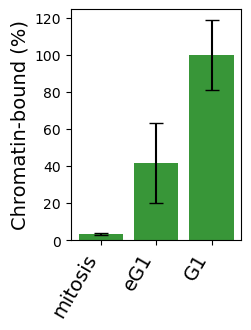

In [82]:
STAG2_mitosis = STAG2_AO["avg_bound_N_per_Mb"].loc[(STAG2_AO["time(min)"]>-8) & (STAG2_AO["time(min)"]<-2)].to_frame()
STAG2_mitosis["phase"] = "mitosis"
STAG2_eG1 = STAG2_AO["avg_bound_N_per_Mb"].loc[(STAG2_AO["time(min)"]>4) & (STAG2_AO["time(min)"]<30)].to_frame()
STAG2_eG1["phase"] = "eG1"
STAG2_G1 = STAG2_AO["avg_bound_N_per_Mb"].loc[(STAG2_AO["time(min)"]>90) & (STAG2_AO["time(min)"]<130)].to_frame()
STAG2_G1["phase"] = "G1"

concat_STAG2 = pd.concat([STAG2_mitosis, STAG2_eG1, STAG2_G1])
concat_STAG2["avg_bound_N_per_Mb_norm"] = (concat_STAG2["avg_bound_N_per_Mb"]/np.mean(concat_STAG2["avg_bound_N_per_Mb"].loc[concat_STAG2["phase"]=="G1"]))*100

data = concat_STAG2
plot = "avg_bound_N_per_Mb_norm"
color = STAG2_color

N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (2.2,3))
p1 = plt.bar(x = ind, height = data.groupby('phase', sort=False)[plot].mean(), width = width, color = color, alpha = 0.9)
plt.errorbar(ind, y = data.groupby('phase', sort=False)[plot].mean(), yerr=data.groupby('phase', sort=False)[plot].std(), fmt="none", color="black", capsize = 5)

plt.ylabel('Chromatin-bound (%)', fontsize = 14)
plt.xticks(ind, ('mitosis', 'eG1', 'G1'),  rotation=60, ha='right', fontsize = 14)
plt.ylim(0,)

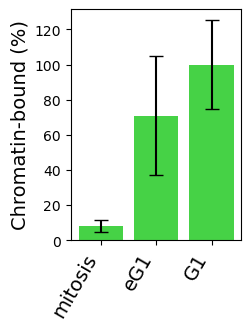

In [83]:
STAG1_mitosis = STAG1_AO["avg_bound_N_per_Mb"].loc[(STAG1_AO["time(min)"]>-8) & (STAG1_AO["time(min)"]<-2)].to_frame()
STAG1_mitosis["phase"] = "mitosis"
STAG1_eG1 = STAG1_AO["avg_bound_N_per_Mb"].loc[(STAG1_AO["time(min)"]>4) & (STAG1_AO["time(min)"]<30)].to_frame()
STAG1_eG1["phase"] = "eG1"
STAG1_G1 = STAG1_AO["avg_bound_N_per_Mb"].loc[(STAG1_AO["time(min)"]>90) & (STAG1_AO["time(min)"]<130)].to_frame()
STAG1_G1["phase"] = "G1"

concat_STAG1 = pd.concat([STAG1_mitosis, STAG1_eG1, STAG1_G1])
concat_STAG1["avg_bound_N_per_Mb_norm"] = (concat_STAG1["avg_bound_N_per_Mb"]/np.mean(concat_STAG1["avg_bound_N_per_Mb"].loc[concat_STAG1["phase"]=="G1"]))*100

data = concat_STAG1
plot = "avg_bound_N_per_Mb_norm"
color = STAG1_color

N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (2.2,3))
p1 = plt.bar(x = ind, height = data.groupby('phase', sort=False)[plot].mean(), width = width, color = color, alpha = 0.9)
plt.errorbar(ind, y = data.groupby('phase', sort=False)[plot].mean(), yerr=data.groupby('phase', sort=False)[plot].std(), fmt="none", color="black", capsize = 5)

plt.ylabel('Chromatin-bound (%)', fontsize = 14)
plt.xticks(ind, ('mitosis', 'eG1', 'G1'),  rotation=60, ha='right', fontsize = 14)
plt.ylim(0,)

(0.0, 122.5393066739012)

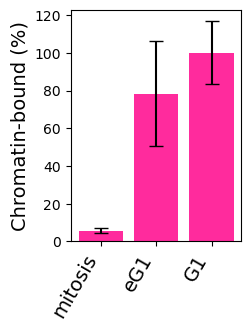

In [58]:
CTCF_mitosis = CTCF_AO["avg_bound_N_per_Mb"].loc[(CTCF_AO["time(min)"]>-8) & (CTCF_AO["time(min)"]<-2)].to_frame()
CTCF_mitosis["phase"] = "mitosis"
CTCF_eG1 = CTCF_AO["avg_bound_N_per_Mb"].loc[(CTCF_AO["time(min)"]>4) & (CTCF_AO["time(min)"]<30)].to_frame()
CTCF_eG1["phase"] = "eG1"
CTCF_G1 = CTCF_AO["avg_bound_N_per_Mb"].loc[(CTCF_AO["time(min)"]>90) & (CTCF_AO["time(min)"]<130)].to_frame()
CTCF_G1["phase"] = "G1"

concat_CTCF = pd.concat([CTCF_mitosis, CTCF_eG1, CTCF_G1])
concat_CTCF["avg_bound_N_per_Mb_norm"] = (concat_CTCF["avg_bound_N_per_Mb"]/np.mean(concat_CTCF["avg_bound_N_per_Mb"].loc[concat_CTCF["phase"]=="G1"]))*100

data = concat_CTCF
plot = "avg_bound_N_per_Mb_norm"
color = CTCF_color

N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (2.2,3))
p1 = plt.bar(x = ind, height = data.groupby('phase', sort=False)[plot].mean(), width = width, color = color, alpha = 0.9)
plt.errorbar(ind, y = data.groupby('phase', sort=False)[plot].mean(), yerr=data.groupby('phase', sort=False)[plot].std(), fmt="none", color="black", capsize = 5)

plt.ylabel('Chromatin-bound (%)', fontsize = 14)
plt.xticks(ind, ('mitosis', 'eG1', 'G1'),  rotation=60, ha='right', fontsize = 14)
plt.ylim(0,)

# Comparison of Condensin FCS-calibrated imaging data with Walther et al. 2018

Calculation of chromatin-bound numbers of Condensins is required, i.e. after subtraction of the cytosolic background.

A few of the timepoints displayed faulty cytosolic segmentation and thus first have to be removed: 

In [61]:
#lists with time-series of which cytoplasmic information cannot be used:
STAG1_cyto_list = ["P:\\Andi\\FCS_Mitotic_Exit\\Data\\20210524_STAG1#8-R1_MitoSys2\\LSM\\DE_W0001_P0001\\DE_2_W0001_P0001_T0001\\TR1_W0001_P0001\\TR1_2_W0001_P0001_T0001.lsm",
                   "P:\\Andi\\FCS_Mitotic_Exit\\Data\\20210524_STAG1#8-R1_MitoSys2\\LSM\\DE_W0008_P0001\\DE_2_W0008_P0001_T0004\\TR1_W0001_P0012\\TR1_2_W0001_P0012_T0001.lsm",
                   "P:\\Andi\\FCS_Mitotic_Exit\\220224_Curated\\Data\\20210601_STAG1#8-R2_MitoSys2\\LSM\\DE_W0002_P0001\\DE_2_W0002_P0001_T0003\\TR1_W0001_P0004\\TR1_2_W0001_P0004_T0001.czi", 
                   "P:\\Andi\\FCS_Mitotic_Exit\\220224_Curated\\Data\\20210601_STAG1#8-R2_MitoSys2\\LSM\\DE_W0006_P0001\\DE_2_W0006_P0001_T0008\\TR1_W0001_P0010\\TR1_2_W0001_P0010_T0001.czi"]
# for STAG1, replicate 1 had to be pasted after replicate 2 and 3 because the different file path names will cause the df.groupby() function to order the dataframe into R2, R3 and only then R1.

RAD21_cyto_list = ["P:\\Andi\\FCS_Mitotic_Exit\\220224_Curated\\Data\\20210603_RAD21-R2_MitoSys2\\LSM\\DE_W0001_P0001\\DE_2_W0001_P0001_T0004\\TR1_W0001_P0012\\TR1_2_W0001_P0012_T0001.czi",
                   "P:\\Andi\\FCS_Mitotic_Exit\\220224_Curated\\Data\\20210603_RAD21-R2_MitoSys2\\LSM\\DE_W0004_P0001\\DE_2_W0004_P0001_T0003\\TR1_W0001_P0009\\TR1_2_W0001_P0009_T0001.czi"]

STAG2_cyto_list = ["P:\\Andi\\FCS_Mitotic_Exit\\220224_Curated\\Data\\20210611_STAG2-R2_MitoSys2\\LSM\\DE_W0008_P0001\\DE_2_W0008_P0001_T0001\\TR1_W0001_P0003\\TR1_2_W0001_P0003_T0001.czi"]

CTCF_cyto_list = []

SMC4_cyto_list = [] # cyto and cell values of DE_2_W0010_P0001_T0001 were replaced manually with NaN (cyto was oversegmented)

NCAPH_cyto_list = [] #values due to faulty acquired z-stacks were replaced manually with NaN. smame for cytosolic oversegmentation values
                     # in DE_2_W0001_P0001_T0007 at t=12
    
NCAPH2_cyto_list = [] #values due cytosolic oversegmentation values in DE_2_W0001_P0001_T0001 - TR1_W0001_P0001 t=17 was replaced manually by NaN

In [65]:
# subtract cytosolic concentrations up until certain time
    
def cyto_bg_subtraction(df):
    NA = 0.602214086
    df["Con_nuc_bgcorr_nM"] = df["Con_nuc_nM"] - df["Con_cyt_nM"]
    df["N_nuc_bg_corr"] = df["Con_nuc_bgcorr_nM"] * df["Vol_nuc_mic3"] * NA
    # also implement con_nuc/con_cyt ratio:
    df["Con_nuc/Con_cyt"] = df["Con_nuc_nM"] / df["Con_cyt_nM"]
    df["percent_chr_enriched"] = df["Con_nuc_bgcorr_nM"] / df["Con_nuc_nM"]
    return df

cyto_bg_subtraction(SMC4_AO)
cyto_bg_subtraction(NCAPH_AO)
cyto_bg_subtraction(NCAPH2_AO)
cyto_bg_subtraction(RAD21_AO)
cyto_bg_subtraction(STAG1_AO)
cyto_bg_subtraction(STAG2_AO)
cyto_bg_subtraction(CTCF_AO)
print()


In [66]:
# for metaphase
SMC4 = SMC4_AO["N_nuc_bg_corr"].loc[SMC4_AO['time(min)']==-8]
NCAPH = NCAPH_AO["N_nuc_bg_corr"].loc[NCAPH_AO['time(min)']==-8]
NCAPH2 = NCAPH2_AO["N_nuc_bg_corr"].loc[NCAPH2_AO['time(min)']==-8]
# for anaphase
SMC4 = SMC4_AO["N_nuc_bg_corr"].loc[SMC4_AO['time(min)']==0]
NCAPH = NCAPH_AO["N_nuc_bg_corr"].loc[NCAPH_AO['time(min)']==0]
NCAPH2 = NCAPH2_AO["N_nuc_bg_corr"].loc[NCAPH2_AO['time(min)']==0]


# Compile data for SMC4

In [67]:
#metaphase
mean_Nike_SMC4 = 252652
sd_Nike_SMC4 = 39130
# anaphase 
mean_Nike_SMC4 = 325522
sd_Nike_SMC4 = 48878

mean_AB_SMC4 = round(np.mean(SMC4),)
sd_AB_SMC4 = round(np.std(SMC4),)
mean_SMC4 = pd.DataFrame(columns=['origin','mean','sd', 'POI'], index=['1','2'])
mean_SMC4.loc['1'] = pd.Series({'origin': "Walther et al. 2018", 'mean':mean_Nike_SMC4, 'sd':sd_Nike_SMC4, 'POI': 'SMC4'})
mean_SMC4.loc['2'] = pd.Series({'origin': "Brunner et al. 2024", 'mean':mean_AB_SMC4, 'sd':sd_AB_SMC4, 'POI': 'SMC4'})
mean_SMC4


origin    mean     sd   POI
1  Walther et al. 2018  325522  48878  SMC4
2  Brunner et al. 2024  229219  32840  SMC4

# NCAPH

In [68]:
#metaphase
mean_Nike_NCAPH = 140965
sd_Nike_NCAPH = 26521
#anaphase
mean_Nike_NCAPH = 194427
sd_Nike_NCAPH = 37121
mean_AB_NCAPH = round(np.mean(NCAPH),)
sd_AB_NCAPH = round(np.std(NCAPH),)
mean_NCAPH = pd.DataFrame(columns=['origin','mean','sd', 'POI'], index=['1','2'])
mean_NCAPH.loc['1'] = pd.Series({'origin': "Walther et al. 2018", 'mean':mean_Nike_NCAPH, 'sd':sd_Nike_NCAPH, 'POI': 'NCAPH'})
mean_NCAPH.loc['2'] = pd.Series({'origin': "Brunner et al. 2024", 'mean':mean_AB_NCAPH, 'sd':sd_AB_NCAPH, 'POI': 'NCAPH'})
mean_NCAPH


origin    mean     sd    POI
1  Walther et al. 2018  194427  37121  NCAPH
2  Brunner et al. 2024  168884  46804  NCAPH

In [69]:
# NCAPH2, metaphase
mean_Nike_NCAPH2 = 34543
sd_Nike_NCAPH2 = 12521
# NCAPH2, anaphase
mean_Nike_NCAPH2 = 34677
sd_Nike_NCAPH2 = 13294
mean_AB_NCAPH2 = round(np.mean(NCAPH2),)
sd_AB_NCAPH2 = round(np.std(NCAPH2),)
mean_NCAPH2 = pd.DataFrame(columns=['origin','mean','sd', 'POI'], index=['1','2'])
mean_NCAPH2.loc['1'] = pd.Series({'origin': "Walther et al. 2018", 'mean':mean_Nike_NCAPH2, 'sd':sd_Nike_NCAPH2, 'POI': 'NCAPH2'})
mean_NCAPH2.loc['2'] = pd.Series({'origin': "Brunner et al. 2024", 'mean':mean_AB_NCAPH2, 'sd':sd_AB_NCAPH2, 'POI': 'NCAPH2'})
mean_NCAPH2


origin   mean     sd     POI
1  Walther et al. 2018  34677  13294  NCAPH2
2  Brunner et al. 2024  21797   5117  NCAPH2

In [70]:
df = pd.concat([mean_SMC4, mean_NCAPH, mean_NCAPH2])
df

origin    mean     sd     POI
1  Walther et al. 2018  325522  48878    SMC4
2  Brunner et al. 2024  229219  32840    SMC4
1  Walther et al. 2018  194427  37121   NCAPH
2  Brunner et al. 2024  168884  46804   NCAPH
1  Walther et al. 2018   34677  13294  NCAPH2
2  Brunner et al. 2024   21797   5117  NCAPH2

Text(0.5, 1.0, 'SMC4')

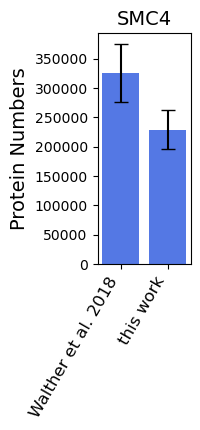

In [71]:
data = mean_SMC4
color = SMC4_color

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (1.2,3))
p1 = plt.bar(x = ind, height = data.groupby("origin", sort = False)["mean"].mean(), width = width, color = color, alpha = 0.9)
plt.errorbar(ind, y = data.groupby("origin", sort = False)["mean"].mean(), yerr=data.groupby("origin", sort = False)["sd"].mean(), fmt="none", color="black", capsize = 5)

plt.ylabel('Protein Numbers', fontsize = 14)
plt.xticks(ind, ('Walther et al. 2018', 'this work'),  rotation=60, ha='right', fontsize = 12)
plt.title("SMC4", fontsize = 14)


Text(0.5, 1.0, 'NCAPH')

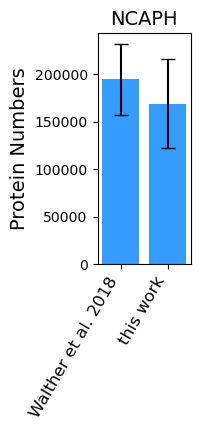

In [72]:
data = mean_NCAPH
color = NCAPH_color

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (1.2,3))
p1 = plt.bar(x = ind, height = data.groupby("origin", sort = False)["mean"].mean(), width = width, color = color, alpha = 0.9)
plt.errorbar(ind, y = data.groupby("origin", sort = False)["mean"].mean(), yerr=data.groupby("origin", sort = False)["sd"].mean(), fmt="none", color="black", capsize = 5)

plt.ylabel('Protein Numbers', fontsize = 14)
plt.xticks(ind, ('Walther et al. 2018', 'this work'),  rotation=60, ha='right', fontsize = 12)
plt.title("NCAPH", fontsize = 14)


Text(0.5, 1.0, 'NCAPH2')

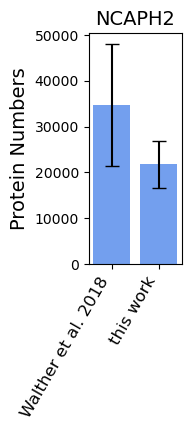

In [73]:
data = mean_NCAPH2
color = NCAPH2_color

N = 2
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots(1,1, figsize = (1.2,3))
p1 = plt.bar(x = ind, height = data.groupby("origin", sort = False)["mean"].mean(), width = width, color = color, alpha = 0.9)
plt.errorbar(ind, y = data.groupby("origin", sort = False)["mean"].mean(), yerr=data.groupby("origin", sort = False)["sd"].mean(), fmt="none", color="black", capsize = 5)

plt.ylabel('Protein Numbers', fontsize = 14)
plt.xticks(ind, ('Walther et al. 2018', 'this work'),  rotation=60, ha='right', fontsize = 12)
plt.title("NCAPH2", fontsize = 14)
